In [3]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Read files
mouse_drug_data = pd.read_csv("../Resources/mouse_drug_data.csv")
clinical_trial_data = pd.read_csv("../Resources/clinicaltrial_data.csv")




# Combine the data into a single dataset
all_mouse_data = pd.merge(mouse_drug_data, clinical_trial_data, how="outer", on="Mouse ID")

all_mouse_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumormean_df = all_mouse_data.groupby(["Drug", "Timepoint"], as_index=False)[["Tumor Volume (mm3)"]].mean()


tumormean_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumorsem_df = all_mouse_data.groupby(["Drug", "Timepoint"])[["Tumor Volume (mm3)"]].sem()
tumorsem_df = tumorsem_df.reset_index()

# Preview DataFrame
tumorsem_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [6]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked

tumorsem_pivot = tumorsem_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

tumormean_pivot = tumormean_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

tumormean_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


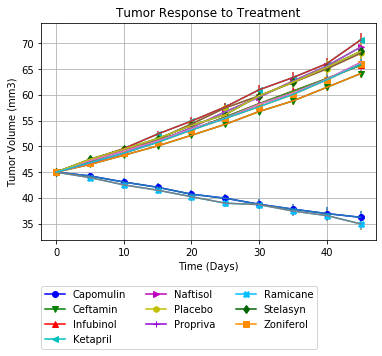

In [12]:
#for each drug graph a new line with the average and use the sem for error bars

columns = list(tumormean_pivot.columns) 
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'darkviolet', 'deepskyblue', 'darkgreen', 'darkorange']


x = tumormean_pivot.index.values
y1 = tumormean_pivot[columns[0]]
plt.plot(x,y1, color = colors[0], label = columns[0], marker = "o")
plt.errorbar(x,y1, yerr = tumorsem_pivot[columns[0]])

y2 = tumormean_pivot[columns[1]]
plt.plot(x,y2, color= colors[1], label = columns[1], marker = "v") 
plt.errorbar(x,y2, yerr = tumorsem_pivot[columns[1]])

y3 = tumormean_pivot[columns[2]]
plt.plot(x,y3, color= colors[2], label = columns[2], marker = "^")
plt.errorbar(x,y3, yerr = tumorsem_pivot[columns[2]])

y4 = tumormean_pivot[columns[3]]
plt.plot(x,y4, color= colors[3], label = columns[3], marker = "<")
plt.errorbar(x,y4, yerr = tumorsem_pivot[columns[3]])

y5 = tumormean_pivot[columns[4]]
plt.plot(x,y5, color= colors[4], label = columns[4], marker = ">")
plt.errorbar(x,y5, yerr = tumorsem_pivot[columns[4]])

y6 = tumormean_pivot[columns[5]]
plt.plot(x,y6, color= colors[5], label = columns[5], marker = "h")
plt.errorbar(x,y6, yerr = tumorsem_pivot[columns[5]])

y7 = tumormean_pivot[columns[6]]
plt.plot(x,y7, color= colors[6], label = columns[6], marker = "+")
plt.errorbar(x,y7, yerr = tumorsem_pivot[columns[6]])

y8 = tumormean_pivot[columns[7]]
plt.plot(x,y8, color= colors[7], label = columns[7], marker = "X")
plt.errorbar(x,y8, yerr = tumorsem_pivot[columns[7]])

y9 = tumormean_pivot[columns[8]]
plt.plot(x,y9, color= colors[8], label = columns[8], marker = "d")
plt.errorbar(x,y9, yerr = tumorsem_pivot[columns[8]])

y10 = tumormean_pivot[columns[9]]
plt.plot(x,y10, color= colors[9], label = columns[9], marker = "s")
plt.errorbar(x,y10, yerr = tumorsem_pivot[columns[9]])


#set the chart labels 
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Response to Treatment")
plt.grid()

#add legend box below the figure so it does not overlap graph
plt.legend(loc='lower left', bbox_to_anchor= (0.0, -0.5), ncol=3,
            borderaxespad=0, frameon=True)
plt.savefig('../images/tumor_response.png')
plt.show()


## Metastatic Response to Treatment

In [98]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

metmean_df = all_mouse_data.groupby(["Drug", "Timepoint"], as_index=False)[["Metastatic Sites"]].mean()


metmean_df .head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [100]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metsem_df = all_mouse_data.groupby(["Drug", "Timepoint"])[["Metastatic Sites"]].sem()
metsem_df = metsem_df.reset_index()

# Preview DataFrame
metsem_df.head()



,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [101]:
# Minor Data Munging to Re-Format the Data Frames

metsem_pivot = metsem_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

metmean_pivot = metmean_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

metmean_pivot


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


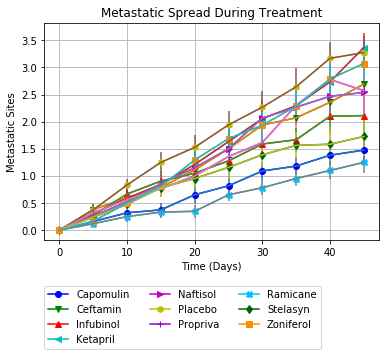

In [119]:
# Generate the Plot (with Error Bars)
columns = list(metmean_pivot.columns) 
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'darkviolet', 'deepskyblue', 'darkgreen', 'darkorange']
markers = ["o", "v", "^", "<", ">", "h", "+", "X", "d", "s"]


x = metmean_pivot.index.values
index = 0

#loop through the column names and for each column plot a line, scatter, and error bars
for column in columns:
    y = metmean_pivot[columns[index]]
    plt.plot(x,y, color = colors[index], label = columns[index], marker = markers[index])
    plt.errorbar(x,y, yerr = metsem_pivot[columns[index]])
    index = index + 1

#set the chart labels 
plt.xlabel("Time (Days)")
plt.ylabel("Metastatic Sites")
plt.title("Metastatic Spread During Treatment")
plt.grid()

#add legend box below the figure so it does not overlap graph
plt.legend(loc='lower left', bbox_to_anchor= (0.0, -0.5), ncol=3,
            borderaxespad=0, frameon=True)
plt.savefig('../images/met_spread.png')
plt.show()

## Survival Rates

In [127]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

mice_df = all_mouse_data.groupby(["Drug", "Timepoint"], as_index=False)[["Metastatic Sites"]].count()

#rename column
mice_df = mice_df.rename(columns={"Metastatic Sites": "Mouse Count"})

mice_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [134]:
# Minor Data Munging to Re-Format the Data Frames

mice_pivot = mice_df.pivot(index='Timepoint', columns='Drug', values='Mouse Count')



mice_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


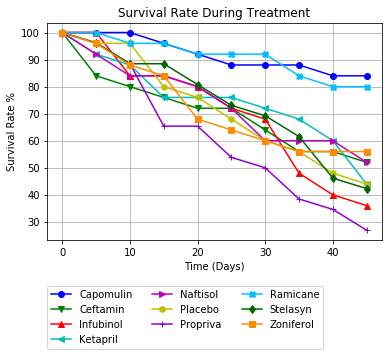

In [259]:
# Generate the Plot (with Error Bars)
columns = list(mice_pivot.columns) 
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'darkviolet', 'deepskyblue', 'darkgreen', 'darkorange']
markers = ["o", "v", "^", "<", ">", "h", "+", "X", "d", "s"]


x = mice_pivot.index.values
index = 0

#loop through the column names and for each column plot a line, scatter, and error bars
for column in columns:
    start_mice = mice_pivot.loc[0,columns[index]]
    y = (mice_pivot[columns[index]]/start_mice)*100
    plt.plot(x,y, color = colors[index], label = columns[index], marker = markers[index])
    index = index + 1

#set the chart labels 
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate %")
plt.title("Survival Rate During Treatment")
plt.grid()

#add legend box below the figure so it does not overlap graph
plt.legend(loc='lower left', bbox_to_anchor= (0.0, -0.5), ncol=3,
            borderaxespad=0, frameon=True)
plt.savefig('../images/survival_rate.png')
plt.show()

## Summary Bar Graph

In [248]:
# Calculate the percent changes for each drug
columns = list(tumormean_pivot.columns) 
percent_change = []
index = 0

#for each drug calculate the percent change by subtracting day 45 from day 0 tumor volume and divide by day 0
for column in columns:
    start_tumor = tumormean_pivot.loc[0,columns[index]]
    end_tumor = tumormean_pivot.loc[45,columns[index]]
    change = (end_tumor - start_tumor)/start_tumor
    percent_change.append(int(round(change*100)) )
    index = index + 1

#create dataframe with the column names and percent change values
data = {'Drugs': columns, 'Percent_Change': percent_change}
change_df = pd.DataFrame(data=data)

#sort the df by percent change
change_df = change_df.sort_values(by='Percent_Change', ascending=True)

change_df

,Drugs,Percent_Change
7,Ramicane,-22
0,Capomulin,-19
1,Ceftamin,43
2,Infubinol,46
6,Propriva,47
9,Zoniferol,47
5,Placebo,51
8,Stelasyn,52
4,Naftisol,54
3,Ketapril,57


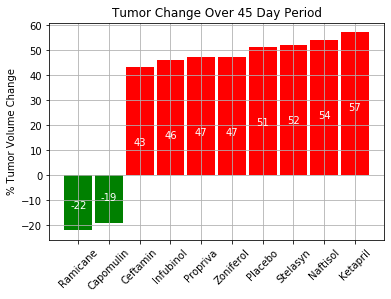

In [258]:
#Group the dataset into greateer than 0 percent change and less than zero using loc
x1 = change_df.loc[change_df['Percent_Change'] < 0] ["Drugs"]
x2 = change_df.loc[change_df['Percent_Change'] > 0] ['Drugs']

y1 = change_df.loc[change_df['Percent_Change'] < 0] ['Percent_Change']
y2 = change_df.loc[change_df['Percent_Change'] > 0] ['Percent_Change']

#plot less than zero percent change as green and greater than zero as red
ax = plt.subplot(1,1,1)
rect1 = ax.bar(x1,y1, color = 'g', width = 0.9)
rect2 = ax.bar(x2,y2, color = 'r', width = 0.9)
plt.xticks(rotation=45)

# using Matplotlib documentation to add labels to the bars (source: https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html)
#create one function for increasing rectangles and one for decreasing so that labels show up in the middle of figures
def autolabel_increase(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, -80),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', color='w')

def autolabel_decrease(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 20),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', color='w')

autolabel_increase(rect2)
autolabel_decrease(rect1)

#Add Chart Labels
plt.ylabel("% Tumor Volume Change")
plt.title("Tumor Change Over 45 Day Period")
plt.grid()

plt.savefig('../images/tumor_change.png')

# Show the Figure
plt.show()